In [35]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from scipy.integrate import odeint

#### Punto 1

$$
\dot{S} = -\beta S I
$$

$$
\dot{I} = \beta S I - \gamma I
$$

$$
\dot{R} = \gamma I
$$

In [36]:
S, I, R, β, γ = sym.symbols('S, I, R, β, γ')
dSdt = -β*S*I
dIdt = β*S*I - γ*I
dRdt = γ*I

#### Simulación

In [37]:
β = 1e-8
γ = 1e-2

#

S0 = 10e6
I0 = 1
R0 = 0

def model_SIR(c, t):
    S, I, R = c
    dSdt = -β*S*I
    dIdt = β*S*I - γ*I
    dRdt = γ*I
    return np.array([dSdt, dIdt, dRdt])

dt = 0.01
tmax = 1000
steps = int(tmax/dt)

t = np.linspace(0,tmax, steps)
C0 = np.array([S0, I0, R0])

sol = odeint(model_SIR,C0,t)

sol_S = sol[:,0]
sol_I = sol[:,1]
sol_R = sol[:,2]

#### Resultados

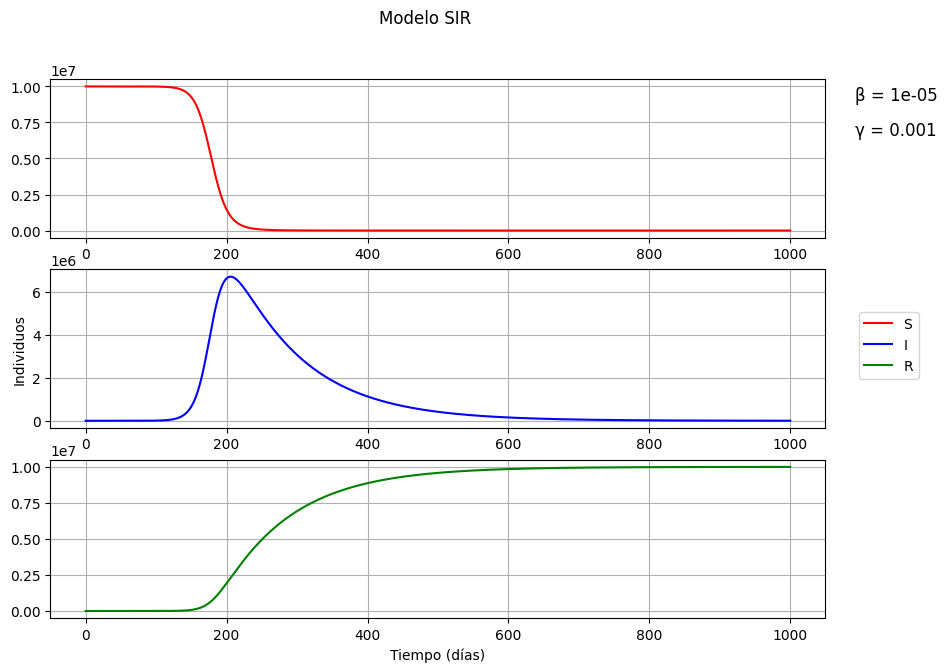

In [38]:
fig, ax = plt.subplots(3, figsize=(10, 7))
colors = ['red', 'blue', 'green']
labels = ['S', 'I' ,'R']

for i in range(0, 3):
    ax[i].plot(t, sol[:,i], color=colors[i], label=labels[i])
    ax[i].grid(True)
fig
ax[1].set_ylabel('Individuos')
ax[2].set_xlabel('Tiempo (días)')

β = 1e-5
γ = 1e-3

fig.suptitle('Modelo SIR')
fig.text(0.93, 0.85, f'β = {β}', fontsize=12)
fig.text(0.93, 0.8, f'γ = {γ}', fontsize=12)

fig.legend(loc='center right', bbox_to_anchor=(1, 0.5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


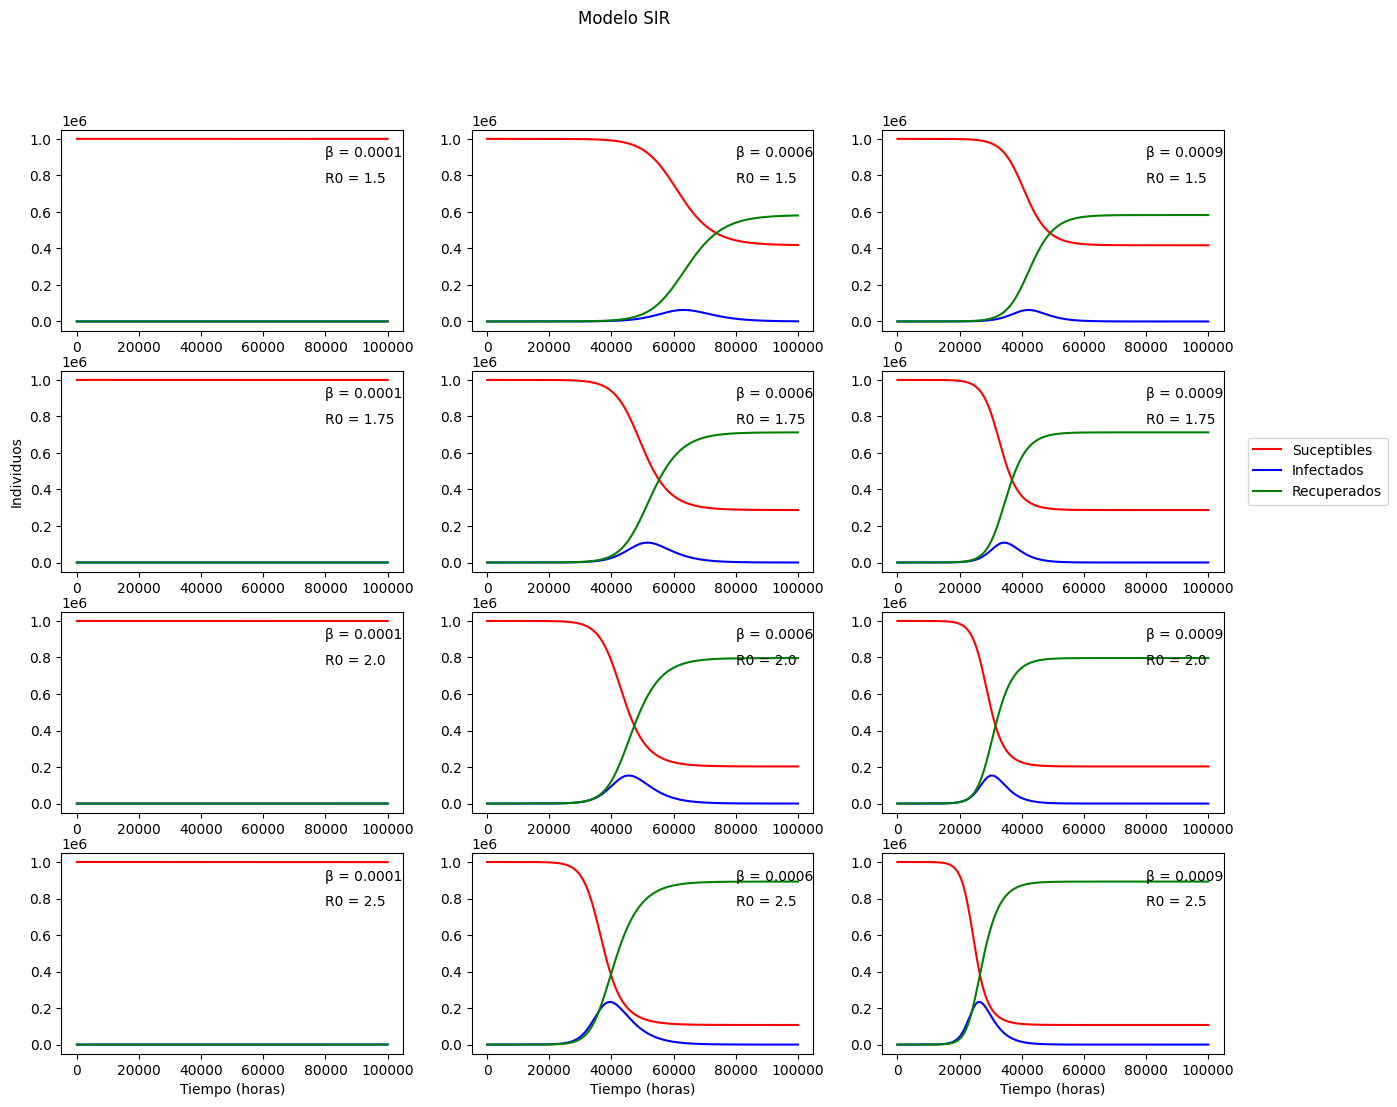

In [51]:
fig, ax = plt.subplots(4, 3,figsize=(15, 12))
r_chimbo_arr = [1.5, 1.75, 2.0, 2.5]
beta_arr = [1e-4, 6e-4, 9e-4]

for f in range(len(r_chimbo_arr)):
    for c in range(len(beta_arr)):
        S0 = 1e6   # Sanos iniciales    (individuo/tiempo)
        I0 = 1      # Infectados iniciales  (individuo/tiempo)
        R0 = 0      # Recuperados iniciales     (individuo/tiempo)

        R_0 = r_chimbo_arr[f]   # NRB -> Una persona infectada cuantas personas me puede infectar

        β = beta_arr[c]     # Tasa de infección (1/t*individuo) ; contactos por hora
        N = S0              # Población total; N = S0 = 1e7 (Individuos)
        γ = (β)/R_0         # Tasa de recuperación (1/tiempo)
        #

        def model_SIR(c, t):
            S, I, R = c
            dSdt = -β*S*(I/N)
            dIdt = β*S*(I/N) - γ*I
            dRdt = γ*I
            return np.array([dSdt, dIdt, dRdt])

        dt = 0.1
        tmax = 100000
        steps = int(tmax/dt)

        t = np.linspace(0,tmax, steps)
        C0 = np.array([S0, I0, R0])

        sol = odeint(model_SIR,C0,t)

        sol_S = sol[:,0]
        sol_I = sol[:,1]
        sol_R = sol[:,2]

        
        # [[f, c] for f in range(4) for c in range(3)]

        ax[f, c].plot(t, sol[:,0], color='red', label='Suceptibles')
        ax[f, c].plot(t, sol[:,1], color='blue', label='Infectados')
        ax[f, c].plot(t, sol[:,2], color='green', label='Recuperados')
        ax[f, c].text(8e4, 9e5, f'β = {β}', fontsize=10)
        ax[f, c].text(8e4, 7.6e5, fr'R0 = {R_0}', fontsize=10)
                
    ax[1, 0].set_ylabel('Individuos')
    ax[3, 0].set_xlabel('Tiempo (horas)')
    ax[3, 1].set_xlabel('Tiempo (horas)')
    ax[3, 2].set_xlabel('Tiempo (horas)')

    fig.suptitle('Modelo SIR')
    ax[1, 2].legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

fig.savefig('modelo_SIR.eps', dpi=1400)

#### Punto 2

Modelo SIRS propuesto:

$$
$$

$$
$$

In [40]:
S, I, R, β, γ, ε= sym.symbols('S, I, R, β, γ, ε')

dSdt = (ε * R) - (β * S * I)
dIdt = (β * S * I) - (γ * I)
dRdt = (γ * I) - (ε * R)

In [41]:
sol_eq = sym.solve([dSdt, dIdt, dRdt], [S, I, R])
sol_eq

[(S, 0, 0), (γ/β, R*ε/γ, R)]

In [42]:
F0 = sym.Matrix([β*S*I])
F0

Matrix([[I*S*β]])

In [43]:
UVE = sym.Matrix([γ*I])
UVE

Matrix([[I*γ]])

In [44]:
VAR = sym.Matrix([I])
VAR

Matrix([[I]])

In [45]:
F = F0.jacobian(VAR)
V = UVE.jacobian(VAR)

In [46]:
F

Matrix([[S*β]])

In [47]:
V

Matrix([[γ]])

In [48]:
DFE = sol_eq[0]
sDFE = DFE[0]
iDFE = DFE[1]
rDFE = DFE[2]

F1 = F.subs(S, sDFE).subs(I, iDFE).subs(R, rDFE)
V1 = V.subs(S, sDFE).subs(I, iDFE).subs(R, rDFE)
V1invertida = V1.inv()
NGM = F1*V1invertida
NGM

Matrix([[S*β/γ]])

In [49]:
NGM.eigenvals()

{S*β/γ: 1}

In [50]:
list(NGM.eigenvals().keys())[0]

S*β/γ